In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [161]:
car_data = pd.read_csv("data/CarPrices.csv")
print(car_data.shape)
print(car_data.dtypes.to_dict())


(205, 26)
{'car_ID': dtype('int64'), 'symboling': dtype('int64'), 'CarName': dtype('O'), 'fueltype': dtype('O'), 'aspiration': dtype('O'), 'doornumber': dtype('O'), 'carbody': dtype('O'), 'drivewheel': dtype('O'), 'enginelocation': dtype('O'), 'wheelbase': dtype('float64'), 'carlength': dtype('float64'), 'carwidth': dtype('float64'), 'carheight': dtype('float64'), 'curbweight': dtype('int64'), 'enginetype': dtype('O'), 'cylindernumber': dtype('O'), 'enginesize': dtype('int64'), 'fuelsystem': dtype('O'), 'boreratio': dtype('float64'), 'stroke': dtype('float64'), 'compressionratio': dtype('float64'), 'horsepower': dtype('int64'), 'peakrpm': dtype('int64'), 'citympg': dtype('int64'), 'highwaympg': dtype('int64'), 'price': dtype('float64')}


In [162]:
split = 200
predictor_variables = ["horsepower"]
predicted_variable = "price"

In [163]:
selected_data = car_data[predictor_variables]
x_train = selected_data[:split].to_numpy()
x_test = selected_data[split:].to_numpy()

prices = car_data[predicted_variable]
y_train = prices[:split].to_numpy()
y_test = prices[split:].to_numpy()

In [164]:
def h(params, x):
    return np.inner(params, x)

# using batch gradient descent update rule
def linear_regression_bgd(xs, ys, learning_rate = 1e-8, max_iter = 100):
    # params = np.random.standard_normal(xs.shape[1])
    params = np.zeros(xs.shape[1])
    for _ in range(max_iter):
        hs = np.array([h(params, x) for x in xs])
        errors = ys - hs
        grad = np.sum(errors * xs.T, 1)
        params = params + learning_rate*grad
    return params

# using stochastic gradient descent update rule
def linear_regression_sgd(xs, ys, learning_rate = 1e-8, max_iter = 10):
    params = np.zeros(xs.shape[1])
    for _ in range(max_iter):
        for x, y in zip(xs, ys):
            h_ = h(params, x)
            error = y - h_
            grad = error * x
            params = params + learning_rate*grad
    return params

# using closed form solution to the linear reggresion problem
def linear_regression_closed(xs, ys):
    xtx = xs.T @ xs
    xxtinv = np.linalg.inv(xtx)
    params = xxtinv @ xs.T @ ys
    return params
    

In [165]:
intercept_term = np.ones((x_train.shape[0], 1))
xs = np.hstack((intercept_term, x_train))
ys = y_train

# print(np.hstack((xs, ys[:, np.newaxis])))

params = linear_regression_sgd(xs, ys, 1e-4, 1)
print(params)

[-144.04483898  205.70516084]


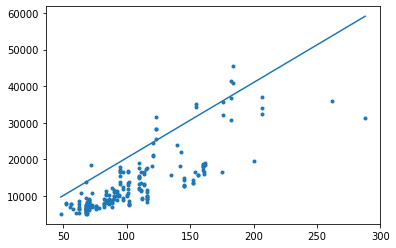

In [166]:
X = xs[:, 1]
Y = ys
plt.scatter(X, Y, marker='.')

b = params[0]
a = params[1]
X = np.linspace(min(X), max(X), 2)
Y = X*a + b
plt.plot(X, Y)
